In [13]:
#load the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

STATISTICAL ANALYSIS

In [2]:
#load the training data and testing data
X_data=pd.read_csv("Train.csv",index_col='Item_Identifier')
Y_data=pd.read_csv("Test.csv",index_col='Item_Identifier')
print(X_data.shape)
print(Y_data.shape)
print("\nTRAINING DATA:")
print(X_data.head())
print("\n\nTESTING DATA:")
print(Y_data.head())

(8523, 11)
(5681, 10)

TRAINING DATA:
                 Item_Weight Item_Fat_Content  Item_Visibility   
Item_Identifier                                                  
FDA15                   9.30          Low Fat         0.016047  \
DRC01                   5.92          Regular         0.019278   
FDN15                  17.50          Low Fat         0.016760   
FDX07                  19.20          Regular         0.000000   
NCD19                   8.93          Low Fat         0.000000   

                             Item_Type  Item_MRP Outlet_Identifier   
Item_Identifier                                                      
FDA15                            Dairy  249.8092            OUT049  \
DRC01                      Soft Drinks   48.2692            OUT018   
FDN15                             Meat  141.6180            OUT049   
FDX07            Fruits and Vegetables  182.0950            OUT010   
NCD19                        Household   53.8614            OUT013   

        

In [3]:
print("\nTRAINING DATA:")
X_data.describe()


TRAINING DATA:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
#Number of missing values in training data
missing_values_count = X_data.isnull().sum()
missing_values_count

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
import warnings
warnings.filterwarnings('ignore')

FILLING MISSING VALUES

In [6]:
#total missing values
total_cells = np.product(X_data.shape)
total_missing = missing_values_count.sum()
#Finding the percent of data that is missing in the training data
percent_missing = (total_missing/total_cells) * 100
percent_missing

4.131067805830214

In [7]:
#Filling the columns "Item_Weight" with mean imputation
X_data['Item_Weight'] = X_data['Item_Weight'].fillna(X_data['Item_Weight'].mean())
X_data['Item_Weight'].isnull().sum()


0

In [8]:
#Finding the mode of the outlet_size based on outlet_type
outlet_size_mode=X_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [9]:
#Filling the categorical missing values with mode
miss_bool=X_data['Outlet_Size'].isnull()
X_data.loc[miss_bool,'Outlet_Size']=X_data.loc[miss_bool,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])
X_data['Outlet_Size'].isnull().sum()

0

VISUALIZATION OF DATA

<Axes: xlabel='Item_Weight', ylabel='Density'>

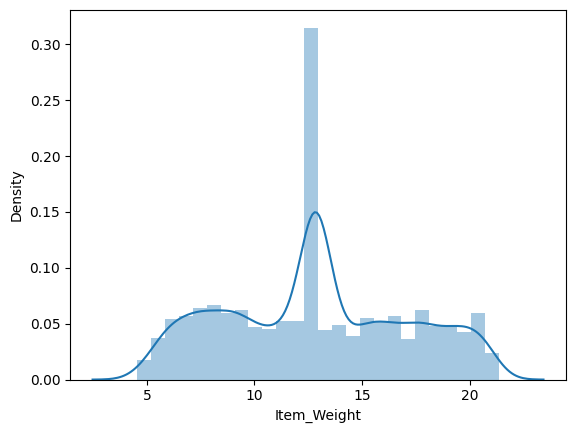

In [10]:
sns.distplot(X_data['Item_Weight'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

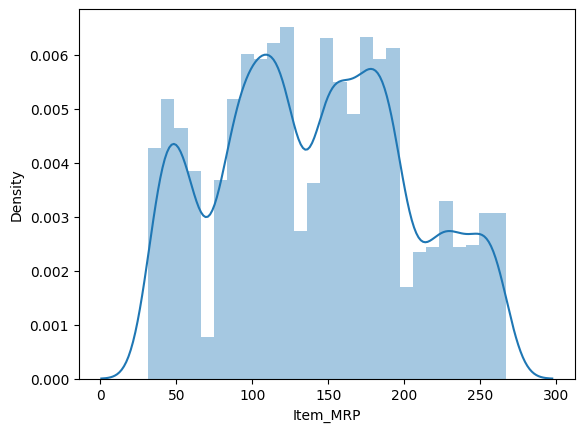

In [11]:
sns.distplot(X_data['Item_MRP'])

<Axes: xlabel='Item_Type', ylabel='Item_MRP'>

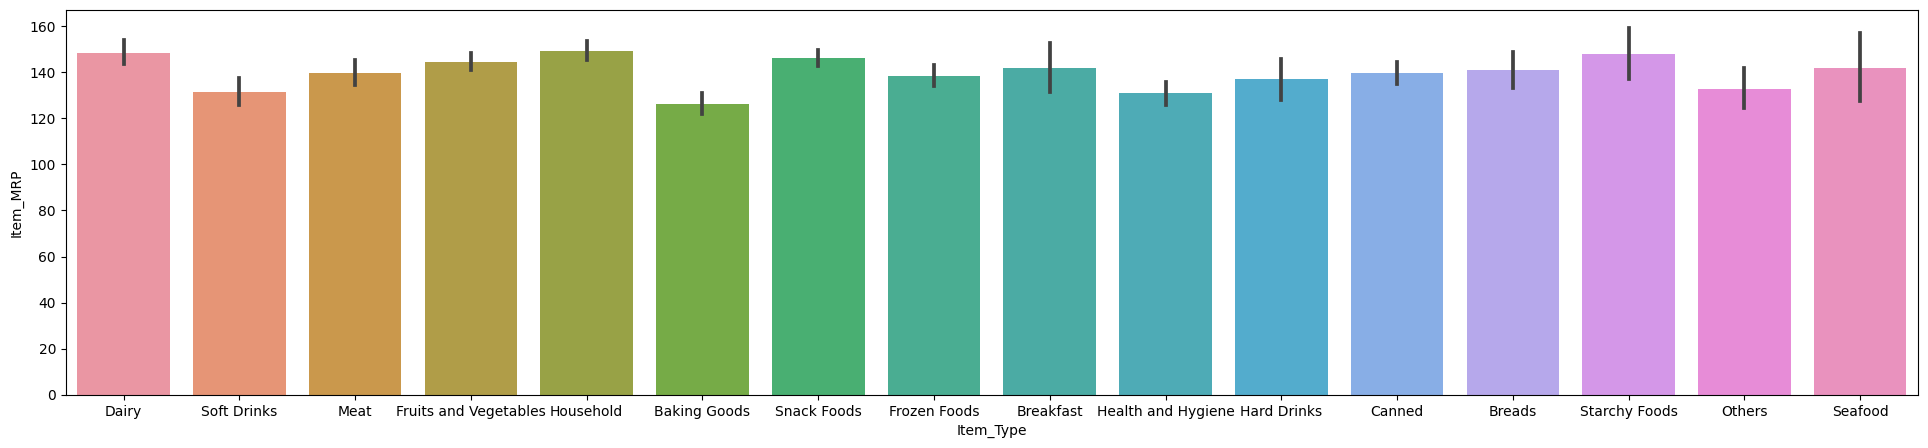

In [25]:
plt.figure(figsize=(23.9,5))
sns.barplot(x=X_data["Item_Type"],y=X_data["Item_MRP"])

<Axes: xlabel='Item_Type', ylabel='Item_Weight'>

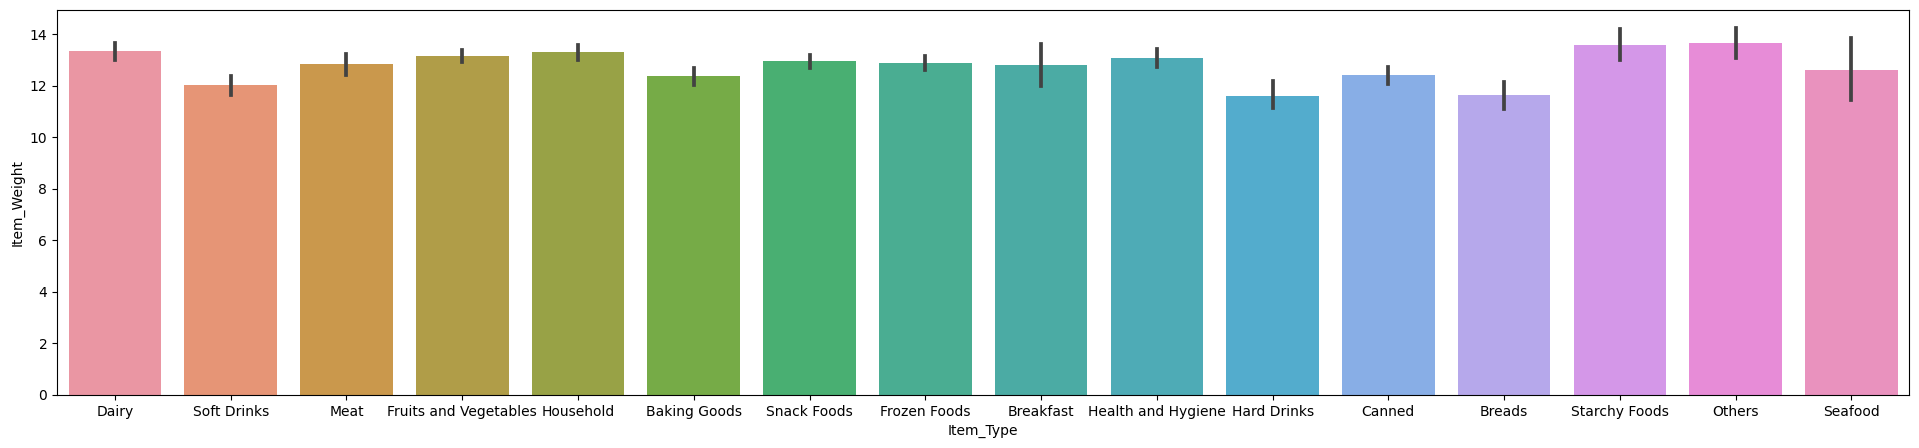

In [28]:
plt.figure(figsize=(23.9,5))
sns.barplot(x=X_data["Item_Type"],y=X_data["Item_Weight"])

<Axes: xlabel='Item_MRP', ylabel='Density'>

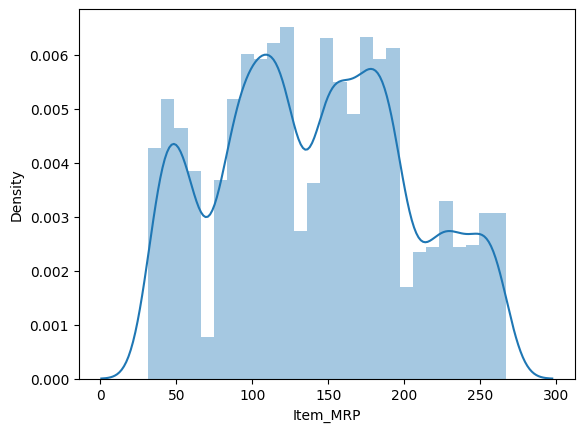

In [11]:
sns.distplot(X_data['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

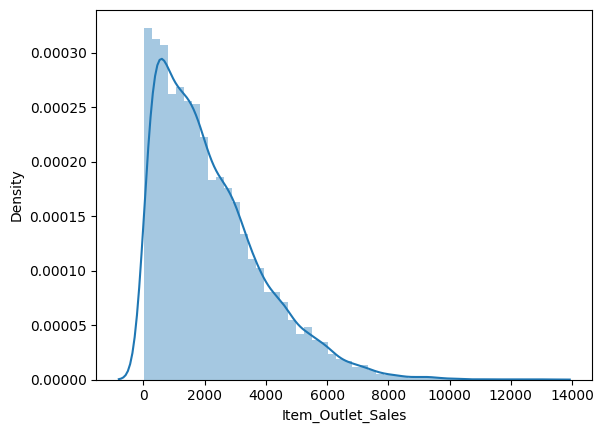

In [54]:
sns.distplot(y)

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

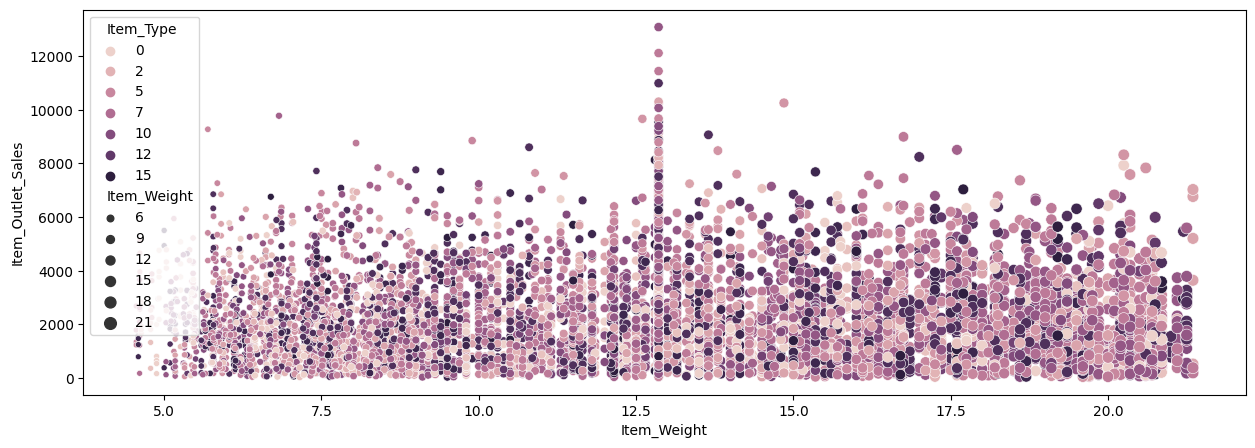

In [67]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Item_Weight',y=y,hue='Item_Type',size='Item_Weight',data=X_data)

<Axes: xlabel='Item_Weight', ylabel='Item_Type'>

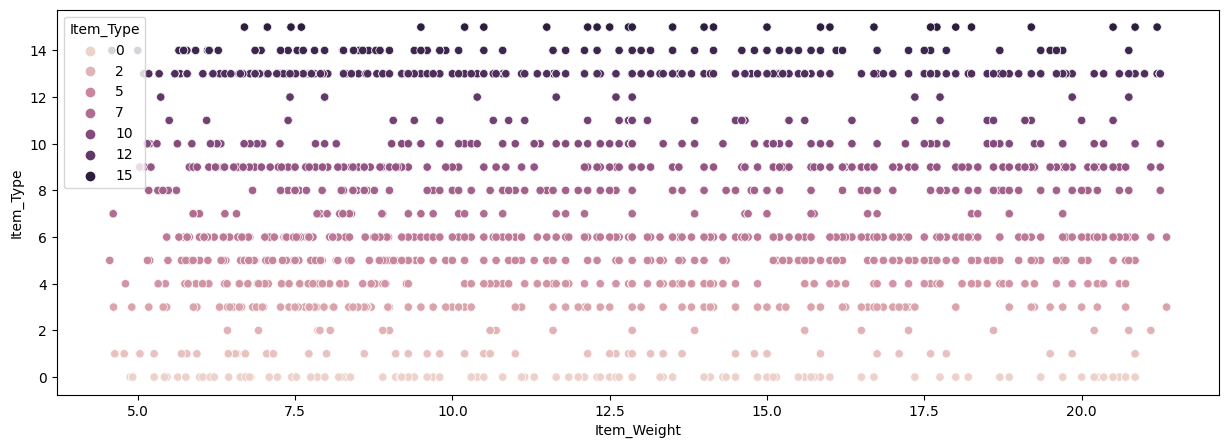

In [68]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Item_Weight',y='Item_Type',hue='Item_Type',data=X_data)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

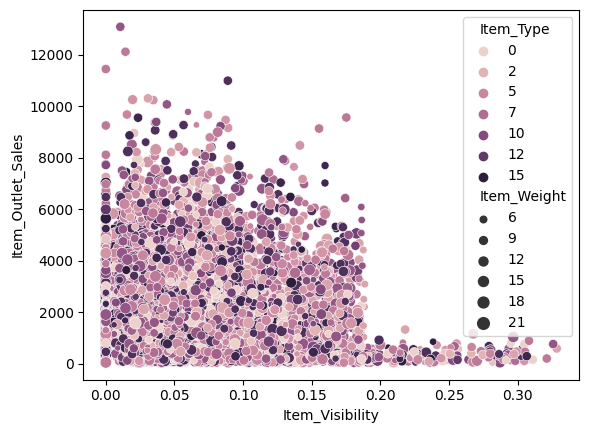

In [69]:
sns.scatterplot(x='Item_Visibility',y=y,hue='Item_Type',size='Item_Weight',data=X_data)

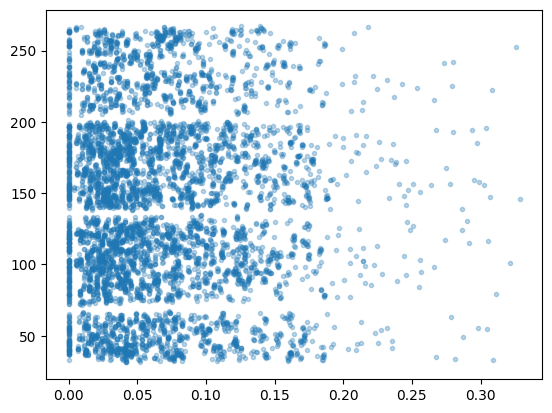

In [53]:
plt.plot(X_train.Item_Visibility,X_train.Item_MRP,".",alpha=0.3)

DATA PREPROCESSING 

In [30]:
X_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.0+ MB


In [32]:
X_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [33]:
Y_data['Item_Fat_Content']= Y_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
X_data['Item_Fat_Content']= X_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [34]:
cat_col=[]
for x in X_data.dtypes.index:
    if X_data.dtypes[x]=='object':
        cat_col.append(x)
cat_col        

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [35]:
cat_col.remove('Outlet_Identifier')
#print the catergorical columns
for col in cat_col:
    print(col)
    print(X_data[col].value_counts())
    print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64



In [36]:
#Copying the Item_Outlet_sales values to a variable for the prediction and then dropping it
X_data.dropna(axis=0, subset=['Item_Outlet_Sales'], inplace=True)
y = X_data['Item_Outlet_Sales']
X_data.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

In [37]:
#LABELENCODING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_data['Outlet']=le.fit_transform(X_data['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    X_data[col]=le.fit_transform(X_data[col])

In [88]:
#SPLIT THE DATA INTO TRAINING AND TESTING SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
print(X_data.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [89]:
#SEGREGATING CATEGORICAL AND NUMERICAL DATA  WITHOUT DUPLICATES
#if it's categorical, checks for unique 
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 20 and 
                        X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
#Copying the categorical and numerical data into another lists for testing and training purpose
X_train1 = X_train[my_cols].copy()
X_test1= X_test[my_cols].copy()

In [90]:
#IMPORTING PACKAGES FOR MODEL TRAINING
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
#IMPUTATION OF NUMERICAL DATA
num_transformer = SimpleImputer(strategy='mean')
#IMPUTATION OF CATEGORICAL DATA WITH ORDINAL ENCODING
#Using simple imputer with most frequent words
#Then uses ordinal encoder to convert each word into digit
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
     ('onehot',OrdinalEncoder())])

In [113]:
#creating a list of column transformer objects.
transformers=[
    ('numerical',num_transformer,numerical_cols),
    ('categorical', cat_transformer,categorical_cols)
    ]
preproc = ColumnTransformer(transformers)
#model with RandomForestRegressor
model = RandomForestRegressor()


In [117]:
from sklearn.metrics import accuracy_score

In [118]:
pipeline = Pipeline(steps =[('preprocessor',preproc ),('model',model)])

In [120]:
#Mean ansolute error 
pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)
print('MAE',mean_absolute_error(y_test,pred))

MAE 812.9019300997068


In [115]:
#prediction of testing data
pred_test = pipeline.predict(Y_data)

In [116]:
# Save test predictions to file
output = pd.DataFrame({'Id': Y_data.index,
                       'Item_Outlet_Sales': pred_test})
output.to_csv('final.csv', index=False)
print(output)

         Id  Item_Outlet_Sales
0     FDW58        1700.399936
1     FDW14        1150.489084
2     NCN55         537.187414
3     FDQ58        2455.197422
4     FDY38        5893.934578
...     ...                ...
5676  FDB58        2408.398340
5677  FDD47        2848.066028
5678  NCO17        1772.992110
5679  FDJ26        4490.840974
5680  FDU37        1655.358566

[5681 rows x 2 columns]
